# Generating the solution figure


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



First, we need to load the text into a data structure. 

Numpy provides useful functionality, especially since we can ignore reading certain lines based on `comments`

In [3]:
data = np.loadtxt('temp.xvg', comments=['@', '#'])


From the data gathered from the simulation, we can compute the mean and standard deviation of these distributions.

We will be determining if the temperature distribution, with its mean and standard deviation, reflect a normal distribution with that same mean and standard deviation

In [4]:
mean = np.mean(data[:,1])
std = np.std(data[:,1])
normal_dist = np.random.normal(loc=mean, scale=std,size=5000)


This next step is the plotting. Notice that there is a command for each set of data we want to plot (`ax.hist()`).

For controlling other parts of the plot, we can call various `set` commands. The arguments for `set_xticks` and `set_xticklabels` is just a list of values and strings (respectively), which tell matplotlib where to put the tick marks and what they shold be labeled as.

Matplotlib supports LaTeX-style strings and formulas. The "$"s tell matplotlib to interpret the contents as mathematical expressions, with mathematical symbols expressed as a command beginning with "\".

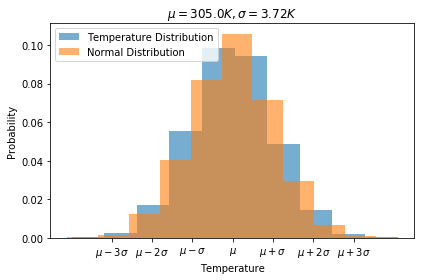

In [5]:
fig, ax = plt.subplots(1,1)
ax.hist(data[:,1], density=True, alpha=0.6, label='Temperature Distribution')
ax.hist(normal_dist,density=True, alpha=0.6, label="Normal Distribution")
ax.set_xticks([mean-3*std, mean-2*std, mean-std, mean, mean+std, mean+2*std, mean+3*std])
ax.set_xticklabels(['$\mu-3\sigma$', '$\mu - 2\sigma$', '$\mu - \sigma$', '$\mu$', '$\mu + \sigma$', '$\mu + 2\sigma$', '$\mu + 3\sigma$'])
ax.legend()
ax.set_ylabel("Probability")
ax.set_xlabel("Temperature")
ax.set_title("$\mu={:3.1f} K, \sigma={:3.2f} K$".format(mean, std))
fig.tight_layout()
fig.savefig('solution.png')